In [42]:
import numpy as np
import mne
import mne_bids
from pathlib import Path
from eztrack.io import read_derivative_npy
from eztrack.viz import PlotFragilityTopomap

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
deriv_fpath = Path("D:/OneDriveParent/OneDrive - Johns Hopkins/Shared Documents/bids/derivatives/sourcesink/win-500/step-250/monopolar/sub-jhh006/sub-jhh006_run-01_desc-ssindmatrix_eeg.npy")
ss_deriv = read_derivative_npy(deriv_fpath)
ss_data = ss_deriv.get_data()

D:\OneDriveParent\OneDrive - Johns Hopkins\Shared Documents\bids\derivatives\sourcesink\win-500\step-250\monopolar\sub-jhh006\sub-jhh006_run-01_desc-ssindmatrix_eeg.json
source entities: {'subject': 'jhh006', 'session': None, 'task': None, 'acquisition': None, 'run': '01', 'processing': None, 'space': None, 'recording': None, 'split': None}


--- Logging error ---
Traceback (most recent call last):
  File "c:\users\patri\appdata\local\programs\python\python38\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "c:\users\patri\appdata\local\programs\python\python38\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\users\patri\appdata\local\programs\python\python38\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'd:\\desktop\\eztrack\\.eztrack\\logging\\eztrack.log' -> 'd:\\desktop\\eztrack\\.eztrack\\logging\\eztrack.log.1'
Call stack:
  File "c:\users\patri\appdata\local\programs\python\python38\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\patri\appdata\local\programs\python\python38\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File

(<Figure size 1800x1800 with 2 Axes>, <AxesSubplot:>)

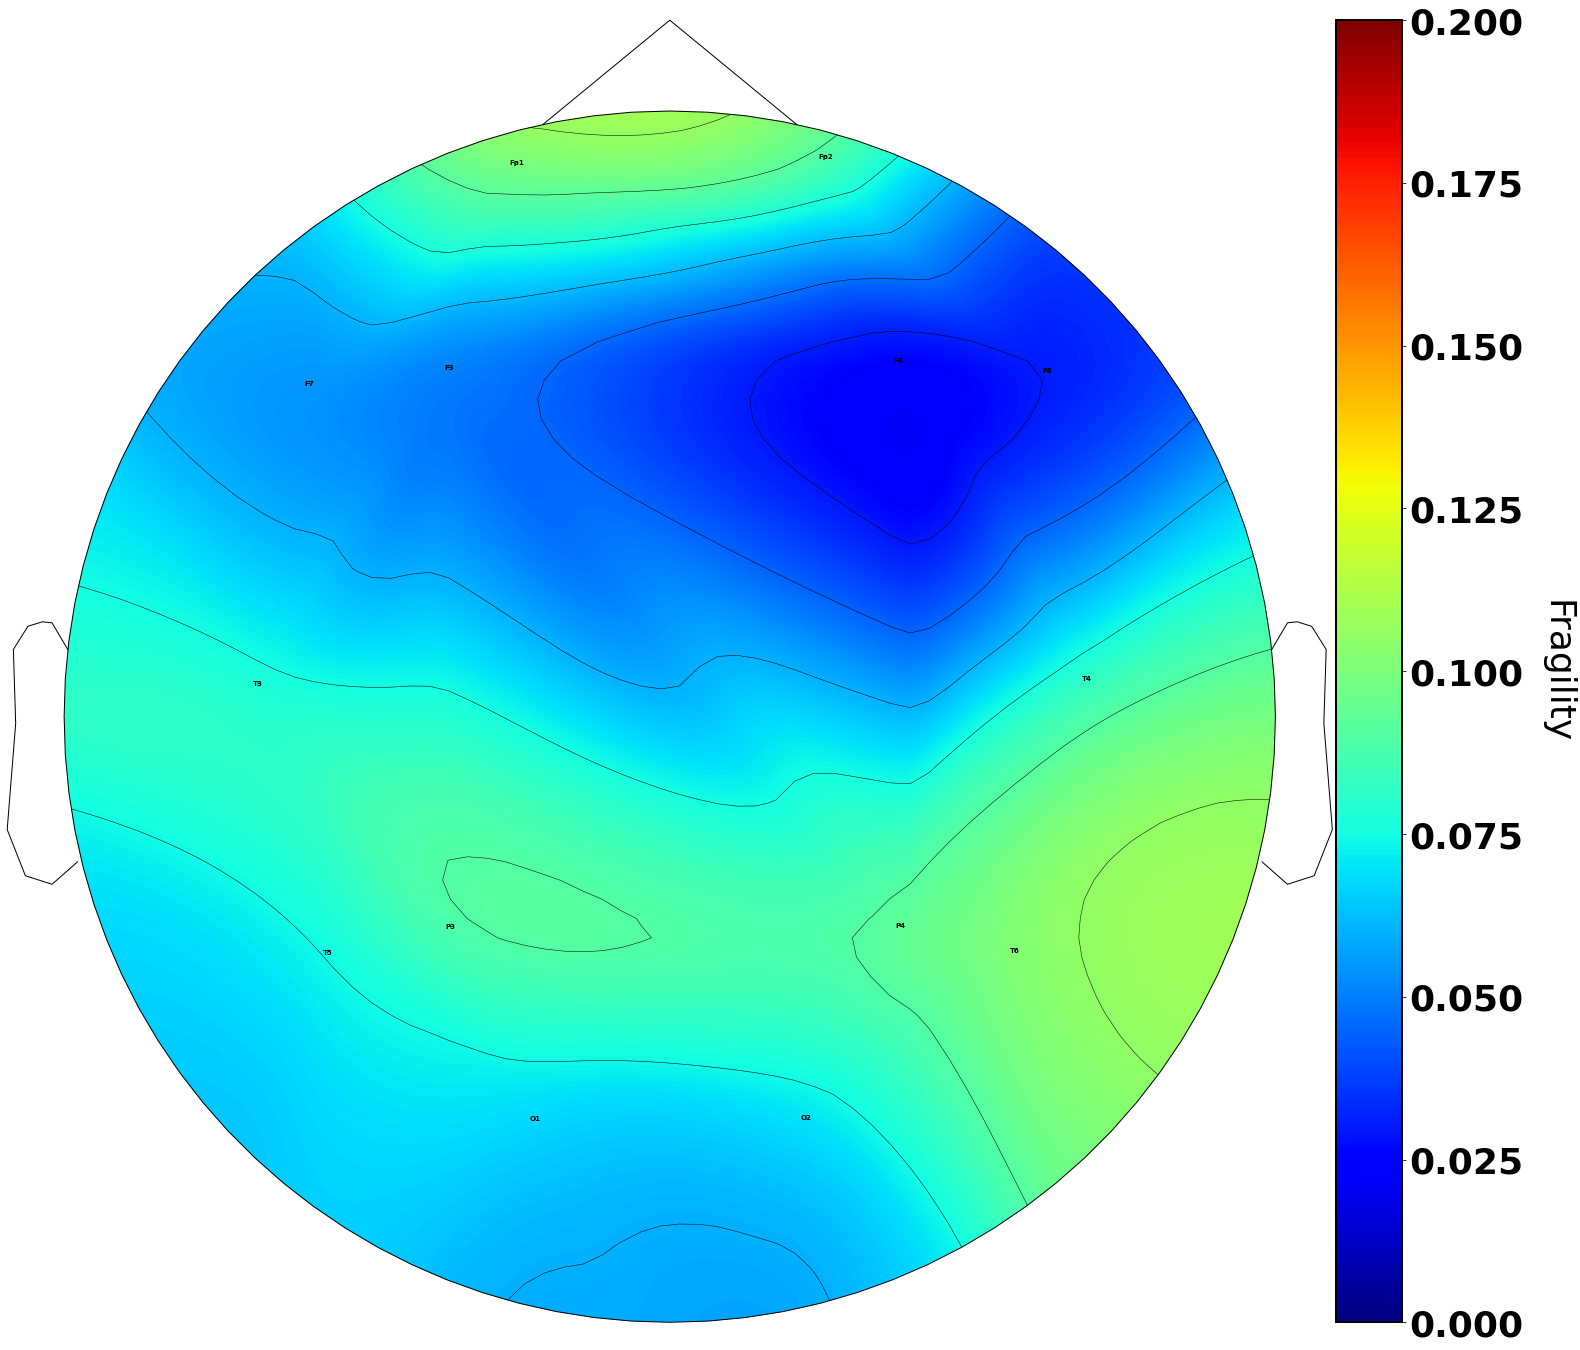

In [44]:
ss_data_dist = np.sum(ss_data, axis=1)
ss_data_pmf = ss_data_dist / np.sum(ss_data_dist)
ss_info = ss_deriv.info
ch_names = ss_deriv.ch_names
plotter = PlotFragilityTopomap()
plot_kwargs = {
    "vmax": 0.2
}
plotter.plot_fragility_topomap(ss_data_pmf, ch_names, fontsize=36, **plot_kwargs)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Fp1'),
  Text(1, 0, 'Fp2'),
  Text(2, 0, 'F3'),
  Text(3, 0, 'F4'),
  Text(4, 0, 'P3'),
  Text(5, 0, 'P4'),
  Text(6, 0, 'O1'),
  Text(7, 0, 'O2'),
  Text(8, 0, 'F7'),
  Text(9, 0, 'F8'),
  Text(10, 0, 'T3'),
  Text(11, 0, 'T4'),
  Text(12, 0, 'T5'),
  Text(13, 0, 'T6')])

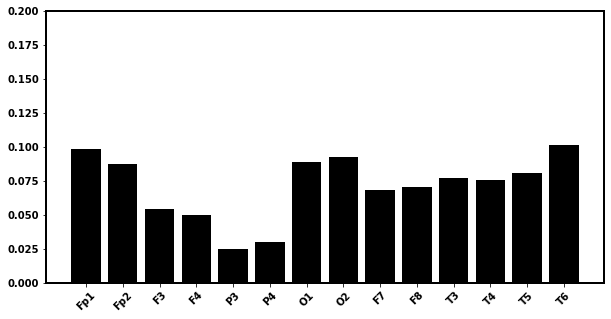

In [45]:
xs = np.arange(len(ch_names))
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(xs, ss_data_pmf, color='k')
ax.set_xticks(xs)
ax.set_xticklabels(ch_names)
ax.set_ylim([0, 0.2])
plt.xticks(rotation = 45)